# Data Wrangling

To begin with, we need to process both the file each containing fake and true new articles and combine them to get a dataset where all new articles are stored. 
Then on further analysis of the combined data there are some data cleaing steps which need to be done to make it analysis freindly and also consume optimal storage/time.

In [1]:
# Importing relevant packages needed for Data wrangling and Exploratory Data Analysis
import pandas as pd
import numpy as np
import os 
from datetime import datetime, date
import calendar

%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
libdir = os.chdir(r'C:\Users\Nidhi\Desktop\Saransh\FinalCapstone\News')

In [3]:
true = pd.read_csv('./data/raw/True.csv.zip')
fake = pd.read_csv('./data/raw/Fake.csv.zip')

In [4]:
#Dataset containing True News
print('Shape of the data containing true news is:',true.shape)
true.head()

Shape of the data containing true news is: (21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
#Dataset containing Fake News
print('Shape of the data containing fake news is:',fake.shape)
fake.head()

Shape of the data containing fake news is: (23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true['isFake'] = 0
fake['isFake'] = 1

In [7]:
df = pd.concat([true,fake],ignore_index=True,axis = 0)
df.shape

(44898, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   isFake   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [9]:
df.head()

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [10]:
df.tail()

,title,text,subject,date,isFake
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [11]:
df.iloc[0]

title      As U.S. budget fight looms, Republicans flip t...
text       WASHINGTON (Reuters) - The head of a conservat...
subject                                         politicsNews
date                                      December 31, 2017 
isFake                                                     0
Name: 0, dtype: object

In [12]:
df['date'] = df['date'].astype('string')
df['title'] = df['title'].astype('string')
df['text'] = df['text'].astype('string')
df['subject'] = df['subject'].astype('category')

In [13]:
def getDate(myDate):
    
    #print(type(myDate),myDate)
    try:
        dt = datetime.strptime(myDate.strip(),'%B %d, %Y')
     
    except:
        try:
            dt = datetime.strptime(myDate.strip(),'%d-%b-%y')
        except:
            try:
                dt = datetime.strptime(myDate.strip(),'%b %d, %Y')
            except:
                dt = datetime.today()
           
    return dt

def getYear(dt):
    return dt.year

def getMonth(dt):
    return dt.month

def getDay(dt):
    return dt.day

def getWeekday(dt):
    daynum = dt.weekday()
    return calendar.day_name[daynum]

In [14]:
df['Date'] = df['date'].apply(getDate)
df['year'] = df['Date'].apply(getYear)
df['month'] = df['Date'].apply(getMonth)
df['day'] = df['Date'].apply(getDay)
df['dayofweek'] = df['Date'].apply(getWeekday)


In [15]:
df.head()

,title,text,subject,date,isFake,Date,year,month,day,dayofweek
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,2017-12-31,2017,12,31,Sunday
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,2017-12-29,2017,12,29,Friday
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,2017-12-31,2017,12,31,Sunday
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,2017-12-30,2017,12,30,Saturday
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,2017-12-29,2017,12,29,Friday


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      44898 non-null  string        
 1   text       44898 non-null  string        
 2   subject    44898 non-null  category      
 3   date       44898 non-null  string        
 4   isFake     44898 non-null  int64         
 5   Date       44898 non-null  datetime64[ns]
 6   year       44898 non-null  int64         
 7   month      44898 non-null  int64         
 8   day        44898 non-null  int64         
 9   dayofweek  44898 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(4), object(1), string(3)
memory usage: 3.1+ MB


In [17]:
df['year'] = df['year'].astype('category')
df['month'] = df['month'].astype('category')
df['day'] = df['day'].astype('category')
df['dayofweek'] = df['dayofweek'].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      44898 non-null  string        
 1   text       44898 non-null  string        
 2   subject    44898 non-null  category      
 3   date       44898 non-null  string        
 4   isFake     44898 non-null  int64         
 5   Date       44898 non-null  datetime64[ns]
 6   year       44898 non-null  category      
 7   month      44898 non-null  category      
 8   day        44898 non-null  category      
 9   dayofweek  44898 non-null  category      
dtypes: category(5), datetime64[ns](1), int64(1), string(3)
memory usage: 1.9 MB


In [19]:
df.subject.unique()

['politicsNews', 'worldnews', 'News', 'politics', 'Government News', 'left-news', 'US_News', 'Middle-east']
Categories (8, object): ['politicsNews', 'worldnews', 'News', 'politics', 'Government News', 'left-news', 'US_News', 'Middle-east']

# Exploratory Data Analysis

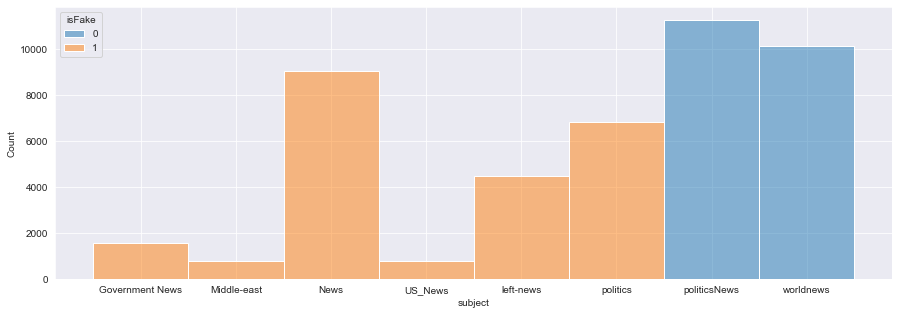

In [20]:
plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'subject',hue = 'isFake')
plt.show()

There are multiple news topics within the dataset, however this will become irrelevant in the model design as the news sub-topics does not align to the goal, hence it can be dropped from further analysis

We need to further analyze the news where year is 2021 as while cleaning data only incoming dates in dataset were given current date and the year column is based on the calculated date

<AxesSubplot:xlabel='year', ylabel='count'>

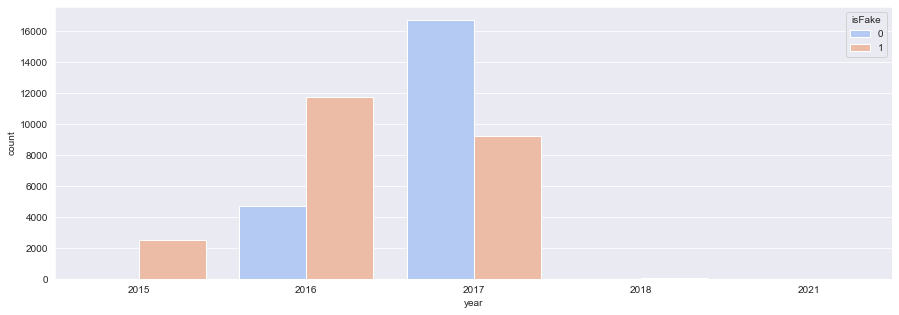

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(data = df,x = 'year', hue = 'isFake', palette = 'coolwarm')

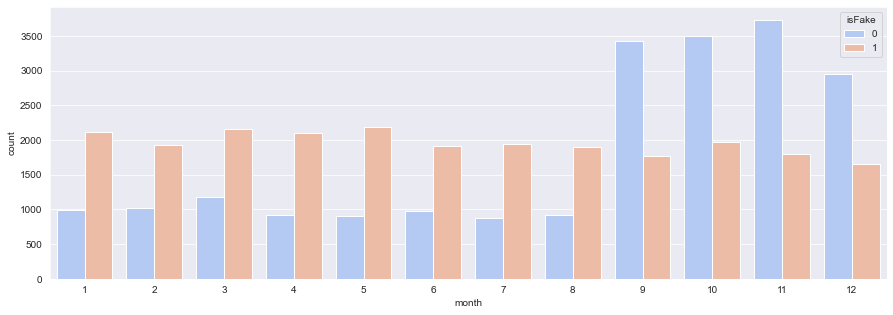

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(data = df,x = 'month', hue = 'isFake', palette = 'coolwarm')
plt.show()

<Figure size 1080x360 with 0 Axes>

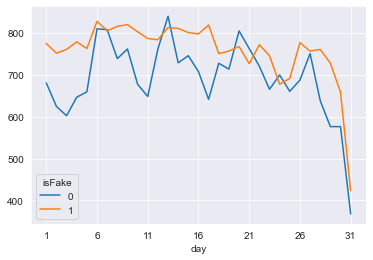

In [23]:
grp = df.groupby(['day','isFake']).isFake.count()
grp.unstack().plot()

#plt.xticks(rotation=45)
plt.show()

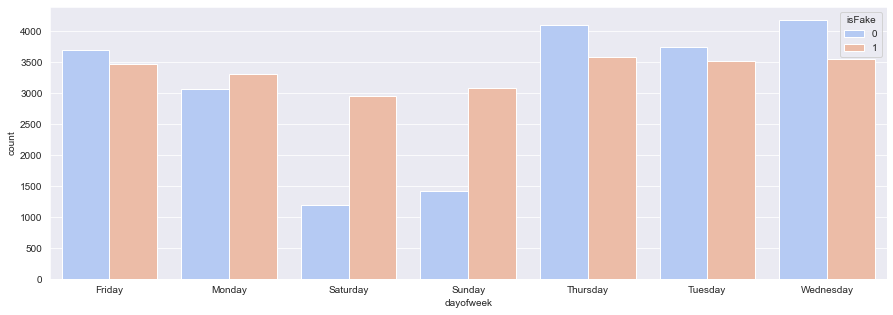

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(data = df,x = 'dayofweek', hue = 'isFake', palette = 'coolwarm')
plt.show()

<Figure size 1080x360 with 0 Axes>

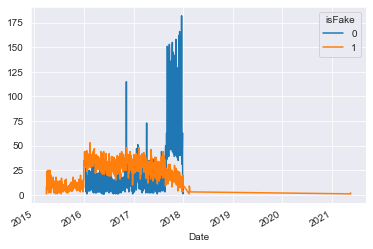

In [25]:
plt.figure(figsize=(15,5))

grp = df.groupby(['Date','isFake']).isFake.count()
grp.unstack().plot()

#plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='isFake', ylabel='Count'>

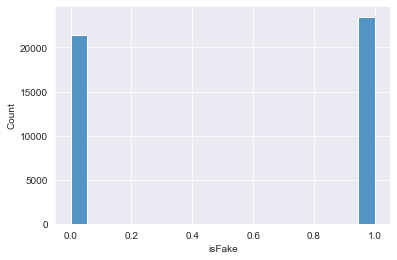

In [26]:
sns.histplot(data = df, x = 'isFake')

In [27]:
# Percentage distribution of fake and true news articles
df.isFake.value_counts()/len(df)

1    0.522985
0    0.477015
Name: isFake, dtype: float64

<b>Observations</b>
- Almost equal distribution of fake and true news. Fake news accounts for 52.3% while True news is 47.7% 
- Most of the news are in year 2017, however 2016 has higher number of fake news as compared to true.
- In 2017, there are almost twice true news as compared to fake news
- In 2015, there are only fake news occurences
- There are higher true news items in the month of September through December
- More fake news are published on weekends
- Generally, there are more fake news articles published during start of each month
- A gradual decline in fake news articles is evident over the years


In [28]:
#Finally exporting the data to csv file for further data/feaure engineering and preprocessing to make it ready for modeling
df.to_csv('./data/interim/cleansed.csv')